<a href="https://colab.research.google.com/github/AmandaGamage/clutter_map_MTD_radar/blob/main/Identifying_the_clutter_map_for_a_monostatic_MTD_surveillance_radar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##A.S.Gamage
See the Assignment for the questions.
                                                                                                                                              



In [ ]:
from math import pi as pi
from math import cos as cos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pandas as pd

In [ ]:
sample_len = 900*4

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/160158v_radar_assgnment5/dataset.csv')
print(df.shape)
print(df.head(20))
print("data types  \n")
print(df.dtypes)

(1048576, 5)
    Sample Number  I-CH           Time  Q CH  ACP
0         -524288  7F7B  -26.214308 ms  FF76    0
1         -524287  7F7B  -26.214258 ms  FF76    0
2         -524286  7F7B  -26.214208 ms  FF76    0
3         -524285  7F7B  -26.214158 ms  FF76    0
4         -524284  7F7B  -26.214108 ms  FF76    0
5         -524283  7F6A  -26.214058 ms  FF77    0
6         -524282  7F6A  -26.214008 ms  FF77    0
7         -524281  7F6A  -26.213958 ms  FF77    0
8         -524280  7F6A  -26.213908 ms  FF77    0
9         -524279  7F6A  -26.213858 ms  FF77    0
10        -524278  7FA7  -26.213808 ms  FF59    0
11        -524277  7FA7  -26.213758 ms  FF59    0
12        -524276  7FA7  -26.213708 ms  FF59    0
13        -524275  7FA7  -26.213658 ms  FF59    0
14        -524274  7FA7  -26.213608 ms  FF59    0
15        -524273  7F3D  -26.213558 ms  FF86    0
16        -524272  7F3D  -26.213508 ms  FF86    0
17        -524271  7F3D  -26.213458 ms  FF86    0
18        -524270  7F3D  -26.213408 m

From above we can observe that the csv file contains 


1.   $I_{CH} \Rightarrow$ Imaginary  component of the radar data
2.   $Q_{CH}\Rightarrow$Real component of the radar data
3. Time stamp
4. Sample number

Following parameters were used.


1.  Sampling Frequency = 4MHz
2.  Samples for one ACP cycle=25000
3.  ACP for one revolution=4096
4.  Transmitted pulse width=14$\mu$s
5.  Pulse repitition interval=900$\mu$s
6.  Actual pulse transmission and reception time=600$\mu$s

#Question 1
*    Since the given data is oversampled by observing the dataset it can be deduced that the data sample has been oversampled by a factor of 5.

*  Hence by downsampling this data by a factor of 5 this can e converted to the normal sampling frequency of 4MHz.

*  The first 10650 entries have been removed to avoid errors.

*  The replace_value function is used to change '7' in MSB of $I_{CH}$ to $F$

*  The convert_hdecimal function is used to convert the data stored in two's complement HEX format to decimal integer values.


In [ ]:
def downsample(arr,samplingfactor,sampling_loc ):
  samples=[]
  for i in range(len(arr)):
      if i%samplingfactor==0:
          samples.append(arr[i])
  return (samples)

In [ ]:
def replace_value(arr):
  new_arr = []
  for val in (arr): #cheack MSB is 7 and replace it with F
    if val[0]=='7':
      hex_str = 'F'+val[1:]
    else:
      hex_str = val
    new_arr.append(hex_str)
  return np.array(new_arr)


In [ ]:
def convert_hdecimal(hex_string, bits):
    val=int(hex_string,16)
    if (val & (1 << (bits - 1))) != 0:
        val = val - (1 << bits)       
    return val                        

In [ ]:
I_CH_up = df['I-CH'].to_numpy()
Q_CH_up = df['Q CH'].to_numpy()
time = df['Time'].to_numpy()

In [ ]:
I_CH = downsample(I_CH_up,5,0)[10650:] #downsample and remove first 10650 samples
Q_CH = downsample(Q_CH_up,5,0)[10650:]
time_axis = np.vectorize(lambda x: x[:len(x)-3:1], otypes=[float])(downsample(df['Time'].to_numpy(),5,0)[10650:])

In [ ]:
I_CH_corrected = replace_value(I_CH)

##Question 2
The response signal can be obtained by

$W[n]=I_{CH}[n]+jQ_{CH}[n]$


In [ ]:
arr1=[]
for I_val in I_CH_corrected:
  arr1.append(convert_hdecimal(I_val,16))

arr2=[]
for Q_val in Q_CH:
  arr2.append(convert_hdecimal(Q_val,16))

Q_CH_processed = np.array(arr2)
I_CH_processed = np.array(arr1)
W = I_CH_processed+1j*Q_CH_processed

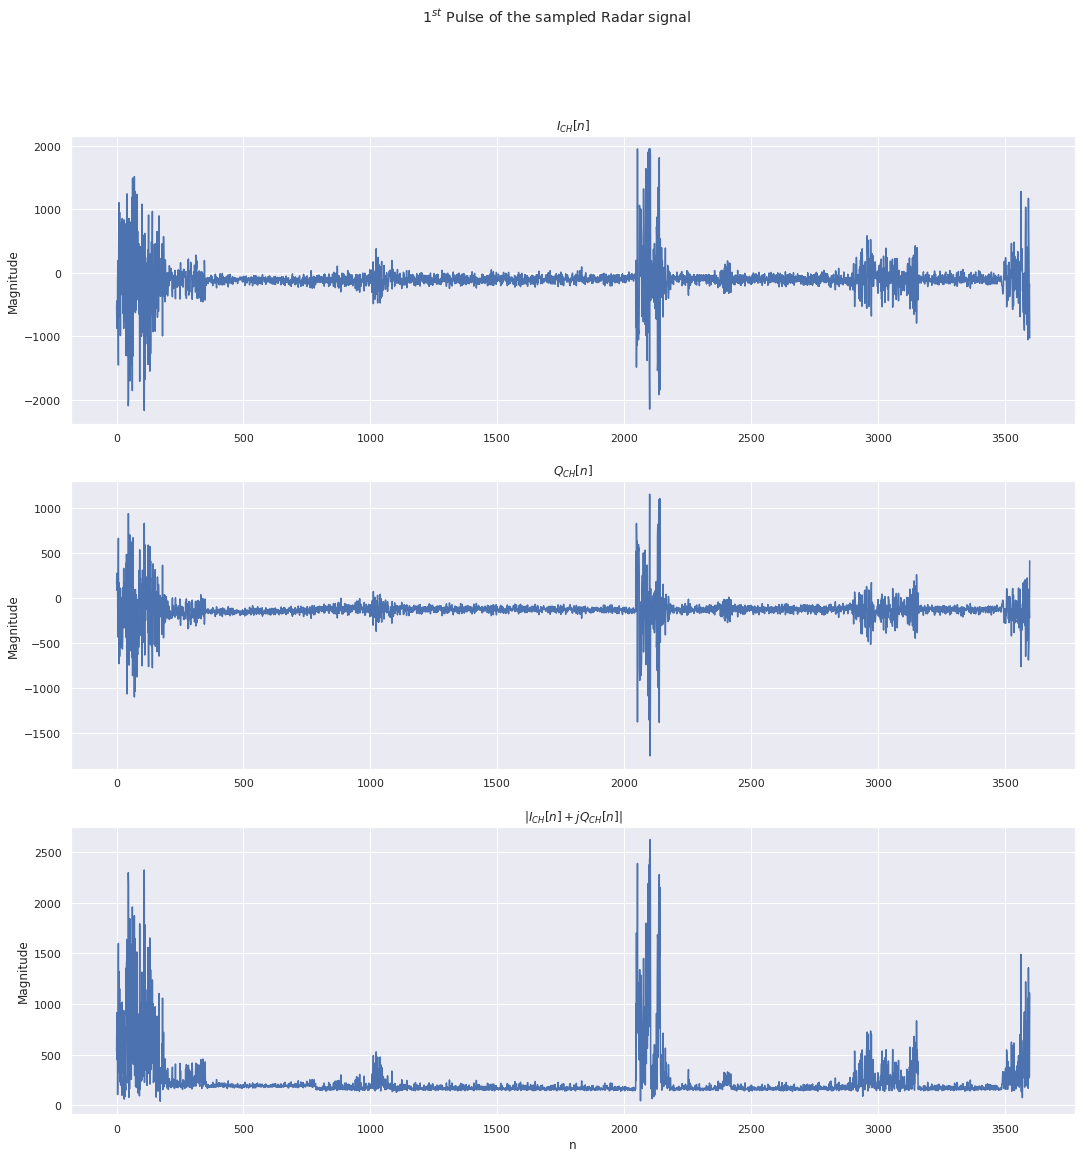

In [ ]:
f,ax = plt.subplots(3,figsize=(18,18))
f.suptitle('$1^{st}$ Pulse of the sampled Radar signal')
ax[0].plot(np.real(dataMatrix[0]))
ax[0].set_title('$I_{CH}[n]$')
ax[0].set( ylabel='Magnitude')

ax[1].plot(np.imag(dataMatrix[0]))
ax[1].set_title('$Q_{CH}[n]$')
ax[1].set( ylabel='Magnitude')

ax[2].plot(np.abs(dataMatrix[0]))
ax[2].set_title('$|I_{CH}[n]+jQ_{CH}[n]|$')
ax[2].set(xlabel='n', ylabel='Magnitude')

plt.show()



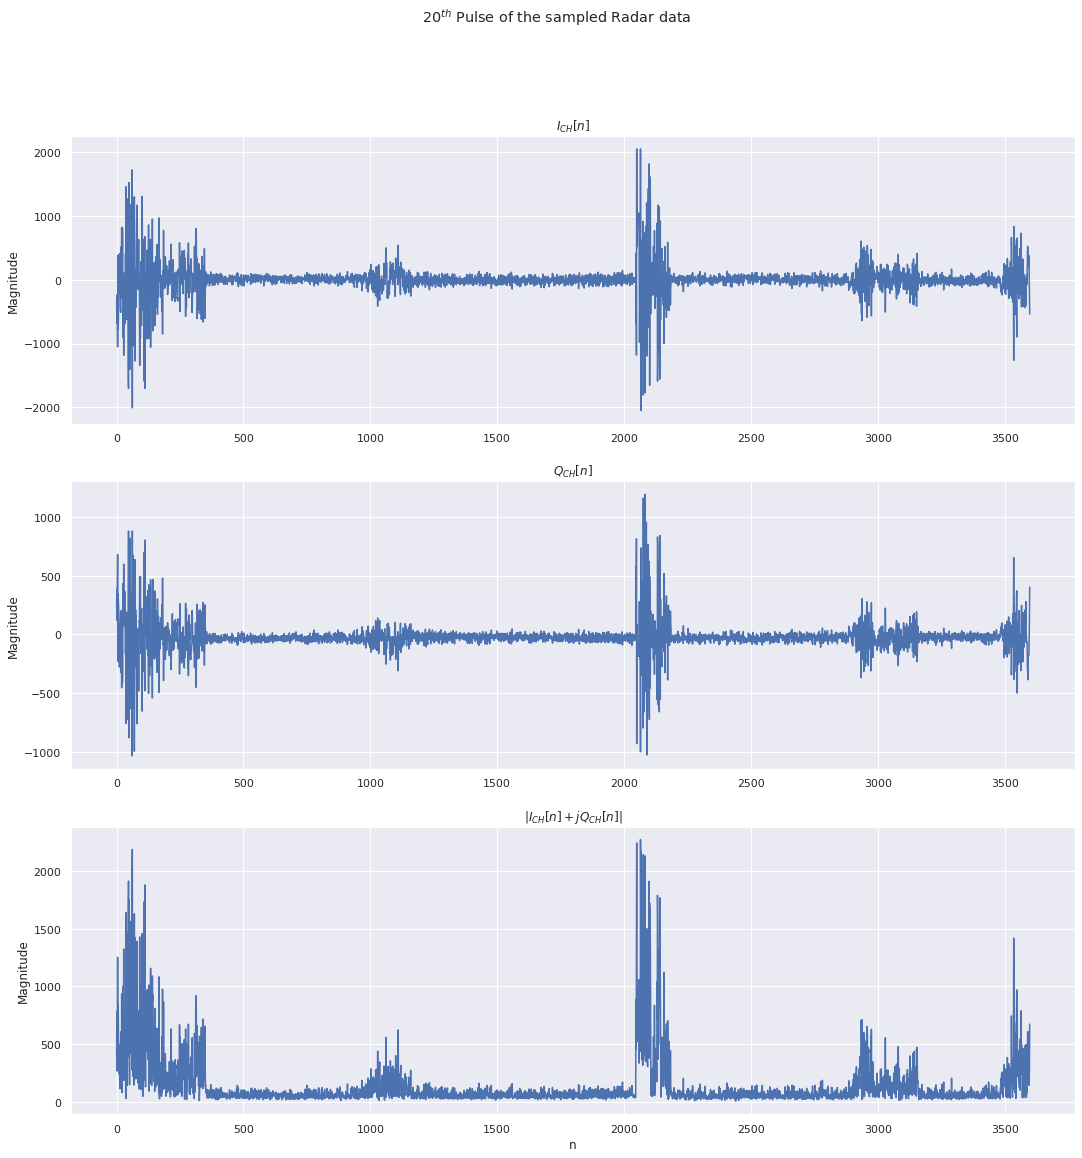

In [ ]:
f,ax = plt.subplots(3,figsize=(18,18))
f.suptitle('$20^{th}$ Pulse of the sampled Radar data')
ax[0].plot(np.real(dataMatrix[19]))
ax[0].set_title('$I_{CH}[n]$')
ax[0].set( ylabel='Magnitude')

ax[1].plot(np.imag(dataMatrix[19]))
ax[1].set_title('$Q_{CH}[n]$')
ax[1].set( ylabel='Magnitude')

ax[2].plot(np.abs(dataMatrix[19]))
ax[2].set_title('$|I_{CH}[n]+jQ_{CH}[n]|$')
ax[2].set(xlabel='n', ylabel='Magnitude')

plt.show()

##Question 3

By observing the above plots we can decide the threshold to be 250

In [ ]:
threshold=250

##Question 4
3600 samples corresponds to $900\mu s$.By allocating $14\mu s$ as blind period and $300\mu s$ as processing time period we get time from $14\mu s$ to $(900-300)\mu s$ for the radar matrix.

Hence, the samples requires should start from $14\mu s\times 4MHz $  to $600\mu s\times 400MHz$


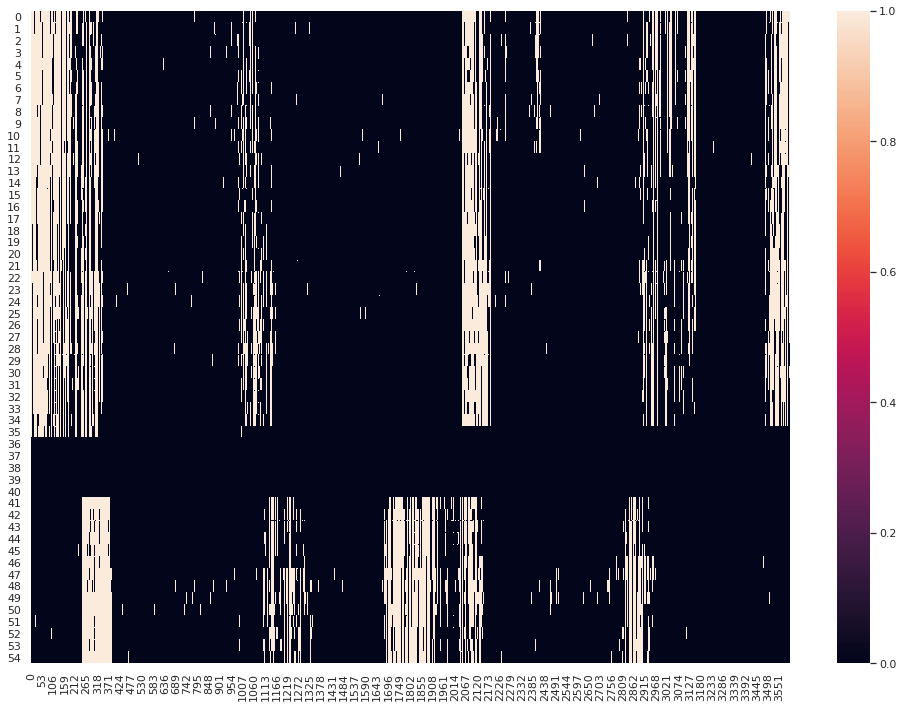

In [ ]:
dataMatrix = W[:int(len(W)/sample_len)*sample_len].reshape(int(len(W)/sample_len),sample_len)
f,ax = plt.subplots(figsize=(17,12))
g2 = sns.heatmap(np.abs(dataMatrix)>threshold)

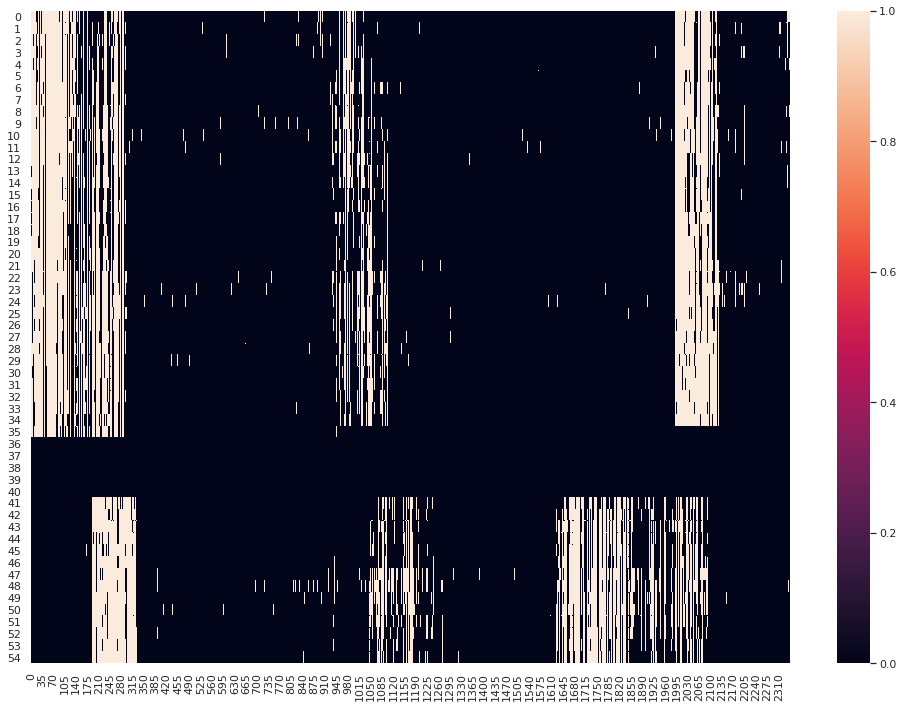

In [ ]:
f,ax = plt.subplots(figsize=(17,12))
g2 = sns.heatmap(np.abs(dataMatrix[:,56:2400])>threshold)

##Question 5

***No. of echos per CPI interval*** $\Rightarrow$
> $=ACPs\space for\space CPI\times \frac{samples\space per ACP}{samples\space per\space echo} $
>$ =32\times \frac{22500/5}{900\times4}$
>$=40$

***Time for one revolution***$\Rightarrow$
> $=ACP\space for\space one\space revolution \times time\space for \space one\space ACP$
> $=4096 \times (22500\times \frac{1}{20\times 10^6}$
>$=4.608s$

***RPM of Radar***$\Rightarrow$
> $=\frac {60}{4.608}$
> $=13.02rpm$

***Beam width of Radar***$\Rightarrow$
> $=32\times \frac{360^0}{4096}$

> $=2.81^0$

##Question 6
From the above clutter maps we can observe that from 36-40 echos only the noise is present.

But from 40 onwards clutter map shows a deviation. 


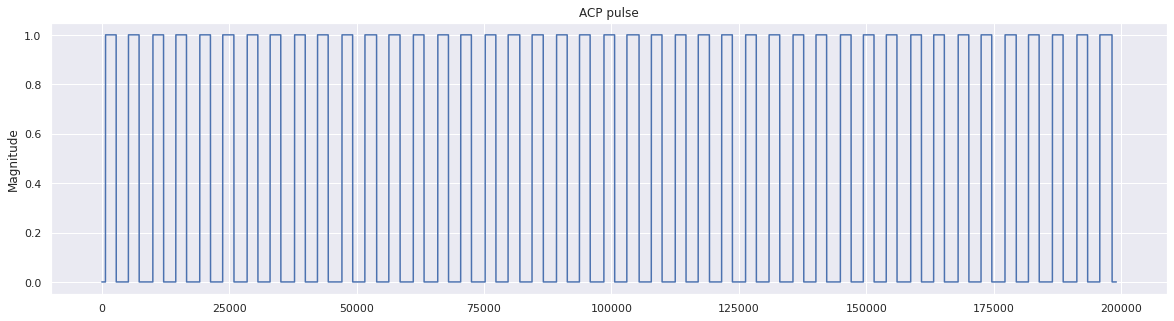

In [ ]:
ACP = downsample(df['ACP'].to_numpy(),5,0)[10650:]
f,ax = plt.subplots(figsize=(20,5))
ax.plot(ACP)
ax.set_title('ACP pulse')
ax.set( ylabel='Magnitude')
plt.show()

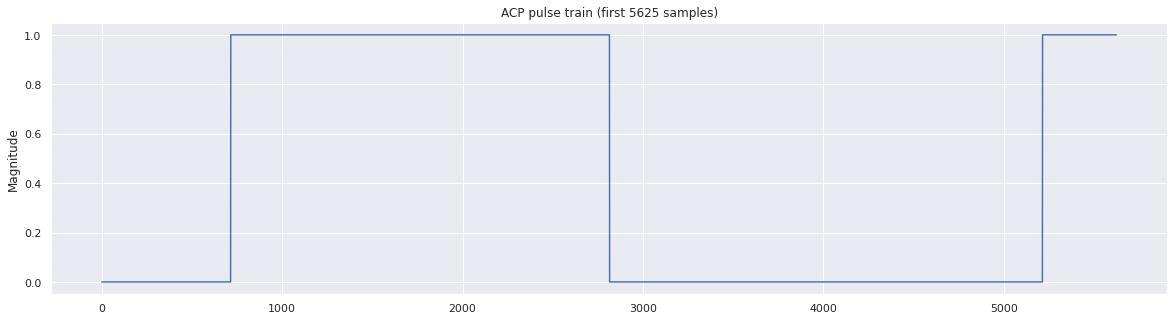

In [ ]:
f,ax = plt.subplots(figsize=(20,5))
ax.plot(ACP[:5625])
ax.set_title('ACP pulse train (first 5625 samples)')
ax.set( ylabel='Magnitude')
plt.show()

Since one cycle should contain $\frac {22500}{5}=5625$ but this contains only about 5000 samplles per cycle we can coclude that the ACP encoder is not synchronized either.

From the clutter map we can see that it contains three main sections.
1. Region that only contains clutter
2. Region where all the recieved signals are lower than the noise threshold.
3. Region where the radar is moving at a constant angular velocity

Since we assume the transmitter to be turned off in the second region, if the transmitter is turned on between $900\mu s$ interval, then sampling of the signal should differ from the 1st region. The clumps we see in the plot is a result of this.

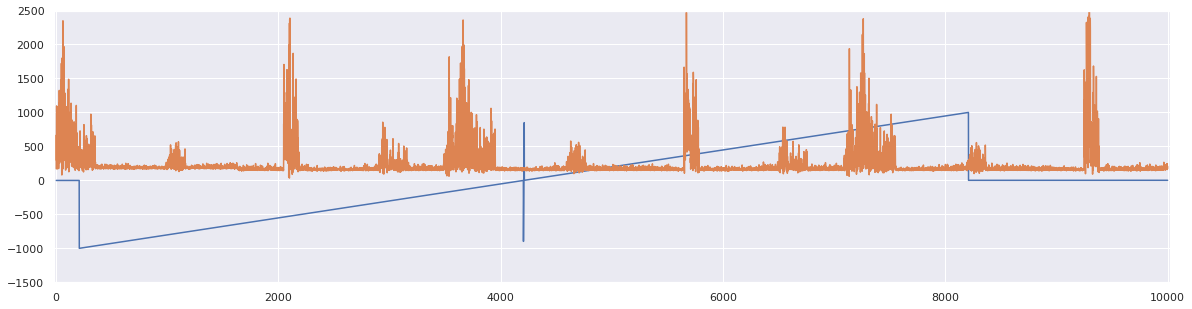

In [ ]:
f,ax = plt.subplots(figsize=(20,5))
plt.ylim(-1500,2500)
plt.xlim(-20,10020)
plt.plot(time_axis[90000:100000])
plt.plot(np.abs(W)[90000:100000])

In [ ]:
timeMat= time_axis[:int(len(W)/sample_len)*sample_len].reshape(int(len(W)/sample_len),sample_len)

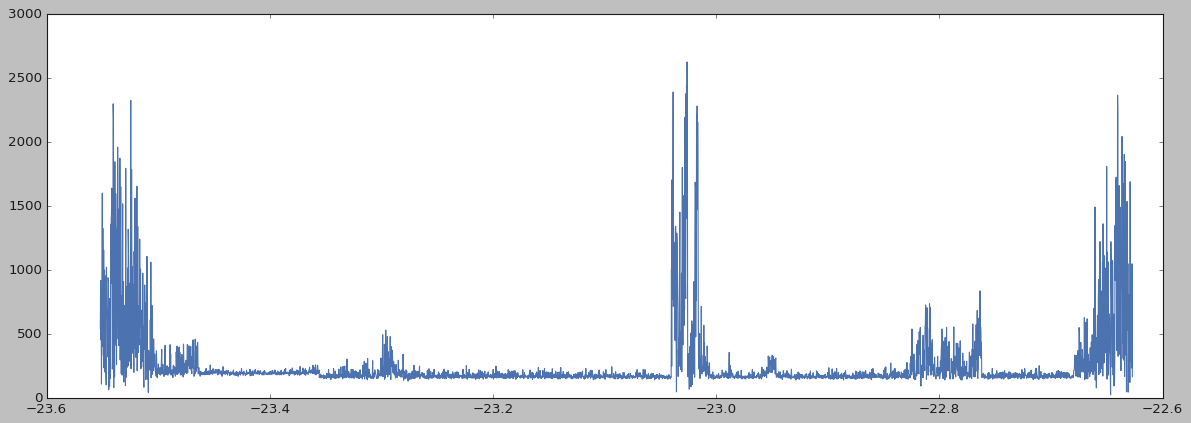

In [ ]:
sns.set_theme(palette="deep")
plt.style.use("classic")
f,ax = plt.subplots(figsize=(18,6))
plt.plot(time_axis[:3700],np.abs(W)[:3700])

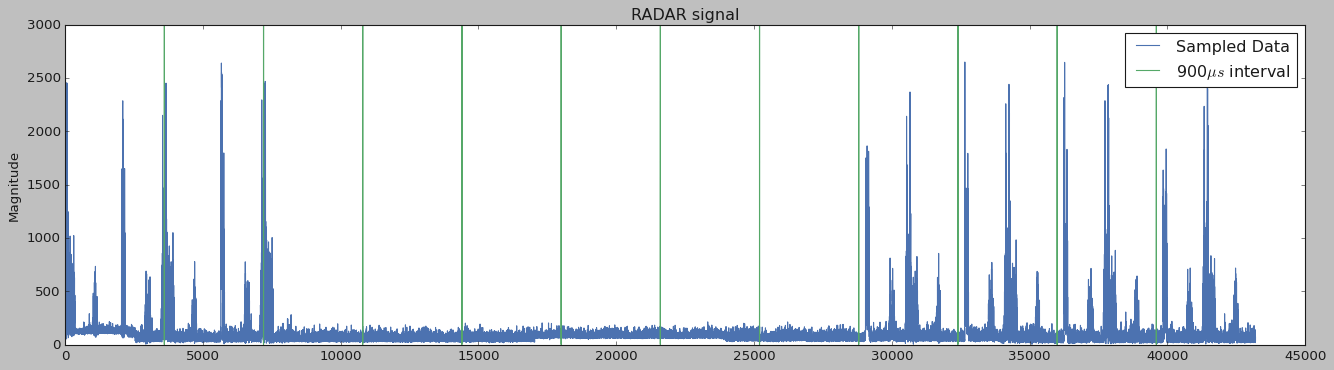

In [ ]:
f,ax = plt.subplots(figsize=(20,5))
plt.plot(np.abs(W)[33*3600:45*3600],label='Sampled Data')

echoe_pulse = np.zeros(len(W))
for i in range(len(W)):
  if i%3600:echoe_pulse[i]=3000

plt.plot(echoe_pulse[33*3600:45*3600],label='900$\mu s$ interval')

ax.set_title('RADAR signal')
ax.set( ylabel='Magnitude')
plt.legend(loc='upper right')
plt.show()

By observing the above plot it can be concluded that the transmitter is turned on in the middle of $900 \mu s$ interval.